# 1. Google colab setup for kaggle dataset

* to work with kaggle datasets in google colab we need to install kaggle through pip.
* also the API token is required to access the dataset.
* the API token can be found in account settings in kaggle.
* kaggle profile _--> My Account --> Create new API token
* copy the api command of dataset.
* In Kaggle, open the dataset you want, then click the three dot next to new notebook button.
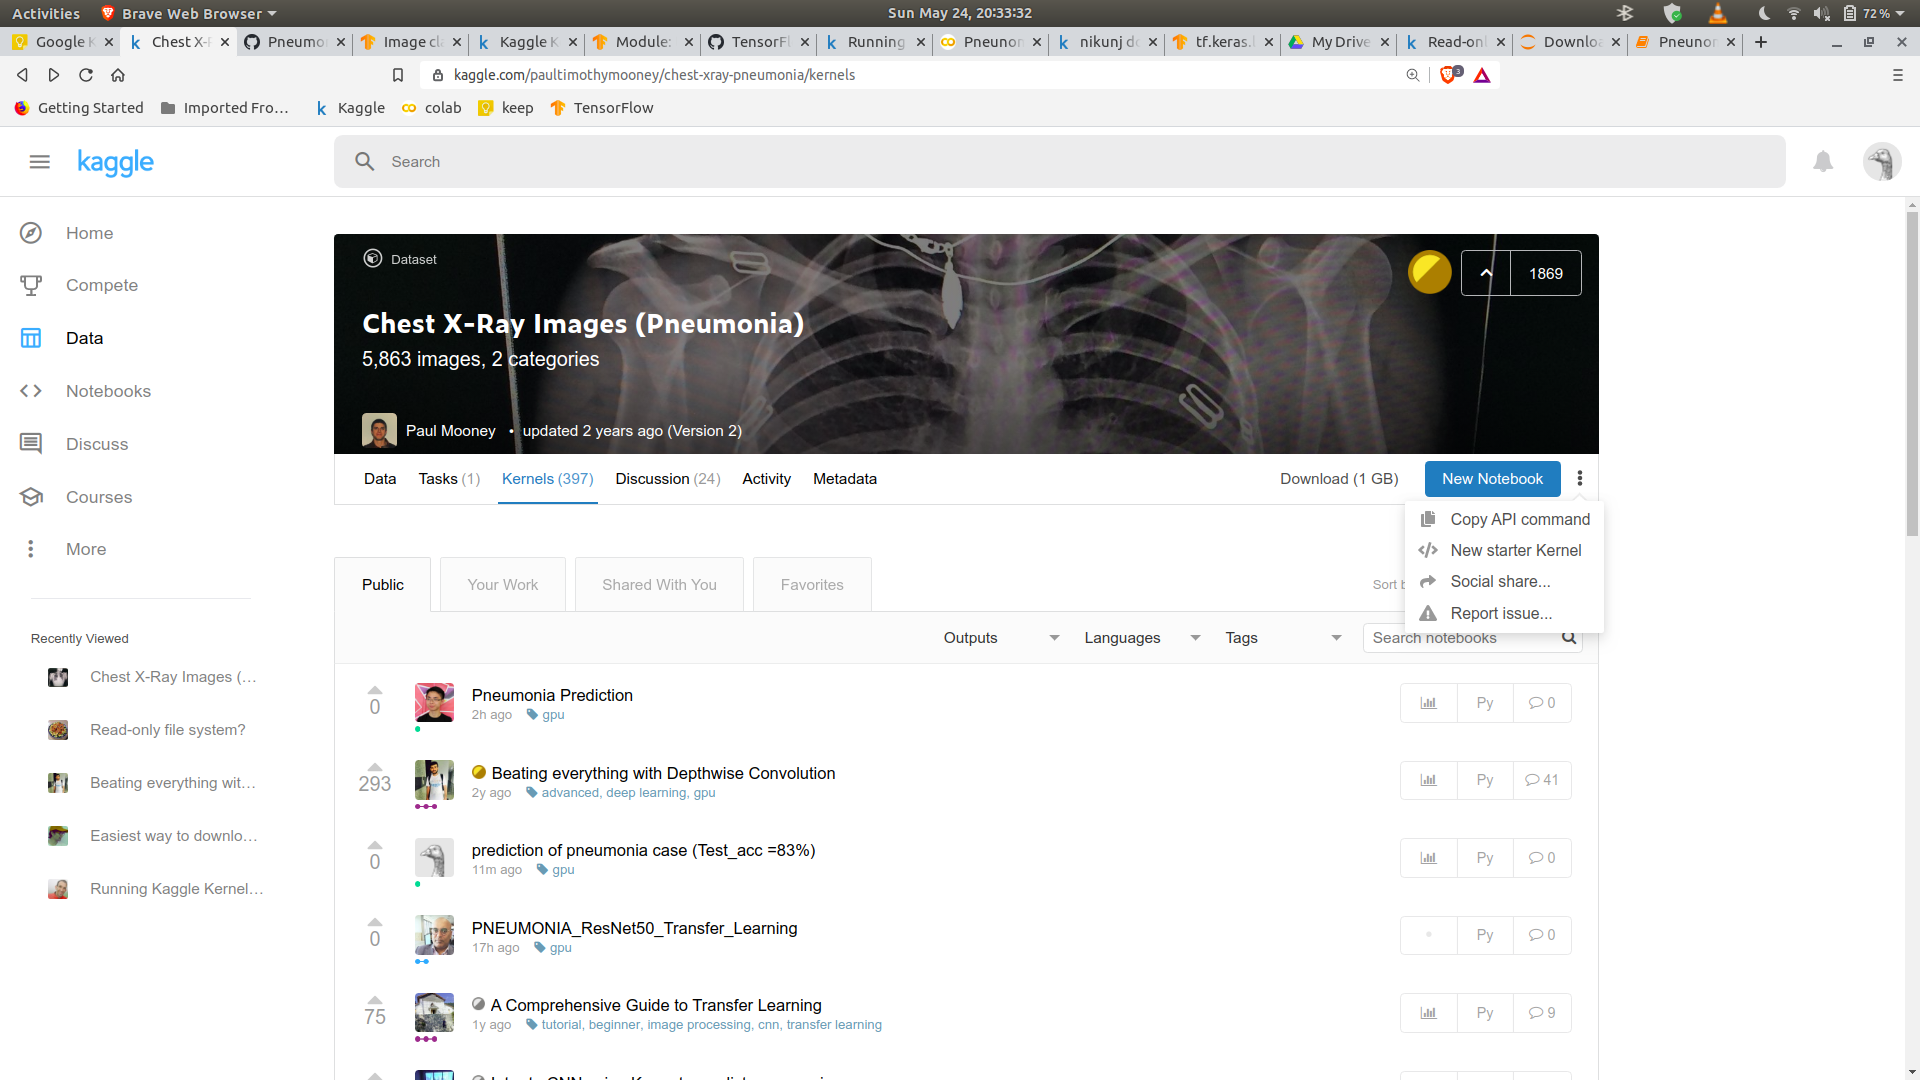

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files

upload the API token (kaggle.json)

In [ ]:
files.upload()

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

paste and run the API command of dataset

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# 2. Importing required libraries

In [0]:
import zipfile
from keras import backend as K
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
%matplotlib inline

In [0]:
#display full output of cell not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
with zipfile.ZipFile("/content/chest-xray-pneumonia.zip", "r") as ref:
  ref.extractall("/content/")

# 3. Data Loading

In [15]:
# 2. Load data 

PATH = "/content/chest_xray/chest_xray"
train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "val")
test_dir = os.path.join(PATH, "test")

train_dir
validation_dir
test_dir

'/content/chest_xray/chest_xray/train'

'/content/chest_xray/chest_xray/val'

'/content/chest_xray/chest_xray/test'

In [86]:
train_norm_dir = os.path.join(train_dir, "NORMAL")  #train directory containing normal(non pneumonia images) 
train_pne_dir = os.path.join(train_dir, "PNEUMONIA") #train directory containing pneumonia images

val_norm_dir = os.path.join(validation_dir, "NORMAL") # validation directory
val_pne_dir = os.path.join(validation_dir, "PNEUMONIA")

total_train = len(os.listdir(train_norm_dir)) + len(os.listdir(train_pne_dir)) #total no of training images
total_val = len(os.listdir(val_norm_dir)) + len(os.listdir(val_pne_dir)) #total no of validation images

#total no of training and validation images
total_train
total_val

4618




618

* validation directory contains only 16 images. that would not be enough for validation.
* next we will take 600 images from training set(300 Normal imgs and 300 pneumonia imgs) and put it in validation directory.

In [69]:
norm_imgs_list = os.listdir(train_norm_dir)
pne_imgs_list = os.listdir(train_pne_dir)

norm_imgs_list = norm_imgs_list[:300]
pne_imgs_list = pne_imgs_list[:300]

'NORMAL2-IM-1277-0001.jpeg'

'/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1277-0001.jpeg'

In [73]:
#moving 300 normal images to validation directory
for img in norm_imgs_list:
  shutil.move(os.path.join(train_norm_dir,img),val_norm_dir)


'/content/chest_xray/chest_xray/val/NORMAL/IM-0560-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1277-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0410-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0223-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0505-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0203-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1156-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0409-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0294-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0663-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0511-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0407-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0351-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0567-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0451-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1241-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0389-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0575-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0995-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1004-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0337-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0428-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0308-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0623-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0718-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1167-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1026-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1028-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1292-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0509-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0761-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0361-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0851-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0686-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0551-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0261-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0636-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0695-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0702-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1152-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0435-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0525-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0757-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1305-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0549-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0244-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0551-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0293-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0511-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1197-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0180-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0262-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0631-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1086-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0855-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0900-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0665-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1247-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0290-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1200-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0937-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0695-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0437-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1055-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0618-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0600-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0499-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0423-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0652-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0490-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1275-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0154-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0522-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0364-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0751-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1128-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0709-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0314-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1123-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0913-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0692-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1256-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1281-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1243-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1220-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0621-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1321-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0622-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0437-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0555-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0395-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1423-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0282-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0983-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0744-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1178-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0643-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1128-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0589-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1056-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0893-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0979-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0670-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0521-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0339-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0571-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0411-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0301-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0469-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0529-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1064-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0479-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0274-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0764-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0870-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0554-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0998-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0603-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0619-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0458-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1147-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0689-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1020-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0718-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0487-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0776-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0309-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0397-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1252-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0969-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0617-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0605-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1025-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0627-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0482-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0268-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1338-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0319-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0656-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0477-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0476-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1202-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0419-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1171-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1020-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1112-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0609-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0569-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0332-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1285-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0304-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0338-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0468-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0865-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0931-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0697-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0393-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1362-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1302-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0814-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0954-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1269-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0299-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0437-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0499-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0502-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0450-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0648-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0635-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0413-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0588-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0693-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0914-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0379-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0583-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0270-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0414-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0633-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0699-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0537-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0539-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0904-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1271-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0642-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0563-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1152-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0586-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0976-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1088-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0447-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0125-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0517-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0981-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0439-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0291-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1060-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1273-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0162-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0406-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0467-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0521-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0772-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0553-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0676-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0551-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0489-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0523-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0499-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0728-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0886-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0687-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1376-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0456-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0686-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1336-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0228-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0826-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1316-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0629-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0611-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0506-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0833-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0531-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0475-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1148-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0609-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0912-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0930-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0585-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1288-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1226-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0257-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0557-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0692-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1357-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0566-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0385-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1291-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0220-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0579-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0595-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0730-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0704-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0657-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0832-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0572-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0665-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1306-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0858-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1043-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0509-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0627-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0583-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0637-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0541-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0172-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0908-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0629-0001-0003.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1345-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0569-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0645-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1157-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0384-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0669-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0906-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0474-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0999-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1175-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0329-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0363-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1093-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0664-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0324-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0214-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0392-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0729-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1318-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1010-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0975-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0987-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0659-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0694-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0497-0001-0002.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0410-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1110-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0986-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0305-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0661-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0714-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0480-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0735-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0983-0001-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1205-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0418-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0391-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/IM-0488-0001.jpeg'

'/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-0403-0001.jpeg'

In [75]:
#moving 300 pneumonia images to validation directory
for img in pne_imgs_list:
  shutil.move(os.path.join(train_pne_dir,img), val_pne_dir)

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1702_bacteria_4508.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1787_bacteria_4634.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1381_virus_2375.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person326_virus_673.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person274_virus_563.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person269_virus_554.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person478_bacteria_2032.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person441_bacteria_1912.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person23_bacteria_96.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1258_bacteria_3216.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person319_bacteria_1477.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person310_virus_633.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1153_virus_1932.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1345_bacteria_3428.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1619_bacteria_4268.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1147_virus_1917.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person25_bacteria_116.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person939_bacteria_2864.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1190_virus_2031.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person383_bacteria_1748.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person773_virus_1402.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person569_bacteria_2363.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person992_bacteria_2919.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person651_bacteria_2543.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1079_bacteria_3019.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person926_virus_1583.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1521_virus_2649.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person338_bacteria_1568.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person348_virus_711.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person9_bacteria_39.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person702_bacteria_2601.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person545_bacteria_2289.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person810_bacteria_2719.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person780_bacteria_2684.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1634_bacteria_4326.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1912_bacteria_4817.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person294_bacteria_1384.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person309_bacteria_1449.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1116_virus_1841.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person400_bacteria_1807.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person911_bacteria_2836.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1297_bacteria_3260.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1581_virus_2741.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1527_virus_2661.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person382_bacteria_1745.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person673_bacteria_2566.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1180_virus_2012.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1597_bacteria_4191.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1310_virus_2255.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person330_virus_683.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person281_bacteria_1330.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1721_bacteria_4546.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person522_bacteria_2210.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person266_bacteria_1249.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person496_bacteria_2095.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person647_virus_1228.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person840_bacteria_2758.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1062_virus_1762.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1038_bacteria_2972.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person41_bacteria_210.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1278_virus_2201.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person523_virus_1043.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1224_virus_2074.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person325_bacteria_1497.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person3_bacteria_10.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1663_bacteria_4411.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person997_virus_1678.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person154_virus_306.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person281_bacteria_1333.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person595_bacteria_2438.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1323_bacteria_3362.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1089_bacteria_3029.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person155_virus_307.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person379_virus_762.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person124_virus_244.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person739_virus_1361.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person544_virus_1074.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1341_bacteria_3406.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person881_bacteria_2805.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person325_bacteria_1500.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person501_bacteria_2112.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person379_bacteria_1722.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1470_bacteria_3829.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1468_virus_2545.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person340_virus_698.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1582_bacteria_4143.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1402_virus_2405.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person868_virus_1514.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person326_bacteria_1506.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person508_virus_1020.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person512_bacteria_2154.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person438_bacteria_1891.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person563_bacteria_2334.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person458_bacteria_1955.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person995_bacteria_2923.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1486_bacteria_3881.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person898_virus_1552.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1544_bacteria_4033.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person445_virus_918.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person108_virus_199.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person691_bacteria_2588.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1524_bacteria_3984.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person841_bacteria_2760.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1045_virus_1741.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1670_bacteria_4431.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person296_bacteria_1397.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person28_bacteria_142.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person575_bacteria_2374.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person408_bacteria_1823.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person889_bacteria_2813.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person396_virus_789.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1455_bacteria_3784.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person132_virus_266.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person515_virus_1032.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person620_virus_1192.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person96_virus_179.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1279_bacteria_3242.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person569_bacteria_2360.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person489_bacteria_2066.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1449_virus_2474.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person371_bacteria_1694.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person590_virus_1138.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person975_virus_1650.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person598_virus_1154.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person755_virus_1382.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1429_bacteria_3690.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1381_bacteria_3517.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person536_virus_1064.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1227_virus_2078.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person61_bacteria_296.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1725_bacteria_4551.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1600_bacteria_4202.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1491_virus_2597.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1685_bacteria_4465.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1918_bacteria_4825.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1357_virus_2338.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1430_bacteria_3695.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1352_bacteria_3445.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1425_virus_2438.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1599_bacteria_4201.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1546_virus_2687.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person383_bacteria_1749.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1400_bacteria_3550.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1076_bacteria_3016.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1082_bacteria_3022.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person90_virus_169.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person403_bacteria_1814.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person292_virus_602.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person916_bacteria_2841.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person363_bacteria_1654.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1182_virus_2017.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1531_virus_2666.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person870_virus_1516.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1684_bacteria_4463.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1003_virus_1685.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person855_virus_1500.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1481_bacteria_3868.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1257_bacteria_3215.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1349_bacteria_3434.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person785_bacteria_2689.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1481_virus_2567.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person423_bacteria_1855.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1290_bacteria_3253.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person26_bacteria_133.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person998_bacteria_2928.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1374_bacteria_3507.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1320_bacteria_3355.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1728_bacteria_4555.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person281_bacteria_1332.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1441_virus_2457.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person778_virus_1408.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person448_bacteria_1937.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person419_virus_857.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1818_bacteria_4676.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person275_bacteria_1293.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1197_bacteria_3147.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person314_bacteria_1461.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person655_bacteria_2547.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person569_virus_1110.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person763_bacteria_2667.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person469_virus_965.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person880_virus_1529.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1192_bacteria_3141.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person413_virus_844.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person327_bacteria_1509.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1581_bacteria_4135.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person749_virus_1374.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1167_bacteria_3113.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person940_virus_1605.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person266_bacteria_1242.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1642_bacteria_4353.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1216_virus_2062.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1597_bacteria_4194.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1158_virus_1942.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person371_bacteria_1695.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person34_bacteria_176.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person77_bacteria_375.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person727_bacteria_2629.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1407_virus_2410.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person575_virus_1119.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1328_virus_2293.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person125_virus_254.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person595_virus_1147.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1598_bacteria_4197.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person518_bacteria_2197.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1413_virus_2423.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1784_bacteria_4631.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1375_bacteria_3509.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person448_bacteria_1933.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person893_bacteria_2818.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person352_bacteria_1625.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person973_virus_1647.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1091_virus_1810.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1124_bacteria_3065.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person820_virus_1456.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person658_bacteria_2550.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person448_virus_922.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person543_bacteria_2281.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1392_bacteria_3538.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1308_bacteria_3286.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person60_bacteria_287.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person499_bacteria_2103.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1180_virus_2015.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person921_bacteria_2846.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person667_virus_1252.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person847_bacteria_2767.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1564_bacteria_4094.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person781_virus_1412.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1532_virus_2667.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1726_bacteria_4552.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person594_virus_1145.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person500_bacteria_2106.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person292_bacteria_1378.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person664_virus_1249.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person569_bacteria_2364.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person438_bacteria_1893.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person369_bacteria_1680.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1365_virus_2348.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1921_bacteria_4828.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1400_bacteria_3554.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person427_bacteria_1866.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person445_bacteria_1928.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1142_virus_1892.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person27_bacteria_136.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person120_virus_226.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person38_bacteria_193.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1085_virus_1797.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person266_bacteria_1244.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person564_bacteria_2342.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person456_virus_943.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1164_virus_1955.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1222_bacteria_3177.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person531_virus_1053.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person858_bacteria_2780.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1069_virus_1772.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person645_virus_1226.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person561_bacteria_2331.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person325_virus_665.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person257_bacteria_1196.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1033_bacteria_2966.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1057_bacteria_2991.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person550_bacteria_2308.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person58_bacteria_272.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1488_virus_2587.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1885_bacteria_4772.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person698_virus_1294.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person972_bacteria_2897.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1107_bacteria_3048.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1141_virus_1890.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person294_bacteria_1381.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person351_bacteria_1624.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1312_bacteria_3314.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person346_virus_709.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1526_bacteria_3986.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person264_bacteria_1229.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person472_virus_969.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1702_bacteria_4506.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person734_bacteria_2637.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1507_bacteria_3946.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person284_virus_582.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person7_bacteria_24.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1156_virus_1935.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person97_virus_180.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1537_virus_2674.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1488_virus_2589.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1446_bacteria_3739.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person862_virus_1507.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person461_virus_950.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1517_bacteria_3968.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1375_bacteria_3510.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1658_bacteria_4402.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person259_bacteria_1217.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person503_bacteria_2126.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1469_bacteria_3824.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person370_virus_753.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person472_bacteria_2015.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person124_virus_236.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1605_bacteria_4226.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person1589_bacteria_4171.jpeg'

'/content/chest_xray/chest_xray/val/PNEUMONIA/person757_bacteria_2661.jpeg'

In [76]:
len(os.listdir(val_norm_dir))
len(os.listdir(val_pne_dir))

309

309

# 4. Inspecting the images

* the images are xray-ed images so are grayscale

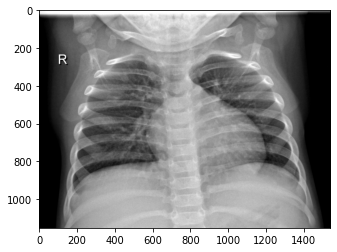

In [17]:
sample_img = os.path.join(train_norm_dir, "IM-0149-0001.jpeg")
show_img = load_img(sample_img)
plt.imshow(show_img)
plt.show;

In [0]:
# 3. preprocessing data

#setting some variables we will be requiring in training
batch_size=28
epochs = 20
img_width = 150
img_height = 150

* our tensorflow model will take RGB image with 3 channels, but we have grayscale images so, ImageDataGenerator will rescale,reshape and do some other augmentation.
* after augmentation and reshaping our input data size will be (img_height, img_width, 3)
* set image width and height to some low to mid range value so computation will be easy. here I am using width and height 150

In [0]:
train_img_generator = ImageDataGenerator(rescale= 1.0/255,
                                        shear_range=0.2,
                                        zoom_range=0.2,)
val_img_generator = ImageDataGenerator(rescale = 1.0/255)
test_img_generator = ImageDataGenerator(rescale = 1.0/255)

* the below code will set labels from directory name(eg. all images in train/NORMAL directory will be labeled 0:Normal and images from train/PNEUMONIA will be labeled 1:PNEUMONIA)
* similarly labels will be set in test and validation directory
* output shows images found belonging to 2 classes(normal and pneumonic)

In [89]:
train_data_gen = train_img_generator.flow_from_directory(batch_size = batch_size,
                                                        directory = train_dir,
                                                        shuffle=True,
                                                        target_size = (img_height,img_width),
                                                        class_mode = 'binary')

val_data_gen = val_img_generator.flow_from_directory(batch_size = batch_size,
                                                    directory = validation_dir,
                                                    shuffle = True,
                                                    target_size = (img_height,img_width),
                                                    class_mode = 'binary')
test_data_gen = test_img_generator.flow_from_directory(batch_size = batch_size,
                                                    directory = test_dir,
                                                    shuffle = True,
                                                    target_size = (img_height,img_width),
                                                    class_mode = 'binary')

Found 4616 images belonging to 2 classes.
Found 616 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


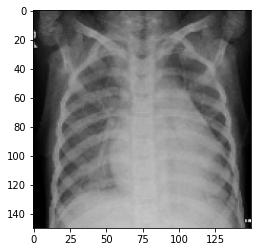

(28, 150, 150, 3)

In [90]:
sample_train_imgs , _=  next(train_data_gen) 
plt.imshow(sample_train_imgs[1])
plt.show();

#training input size (batch_size , width, height, channels)

sample_train_imgs.shape

# 5. Model

* the following model contains pair of two Conv layer followed by Maxpooling.
* the fully connected layer have 2 dense layer, final output layer is activated by Sigmoid.

* Also, there is callback funtion defined and it will callback when accuracy is reached 95%. 
* this callback function helps in preventing overfitting.

In [0]:
model = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3),padding='same'),
                                     tf.keras.layers.Conv2D(16, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.MaxPooling2D((2,2)),
                                     
                                     tf.keras.layers.Conv2D(16, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.Conv2D(16, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.MaxPooling2D((2,2)),
                                     
                                     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.MaxPooling2D((2,2)),

                                     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',padding='same'),
                                     tf.keras.layers.MaxPooling2D((2,2)),

                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


model.compile(optimizer= tf.keras.optimizers.Adam(lr = 1e-5),
              loss='binary_crossentropy',
              metrics=['acc']
               )

model.summary()

# 6. Training model 

In [94]:
history = model.fit_generator(train_data_gen,
                             steps_per_epoch = total_train // batch_size,
                             epochs= epochs,
                             validation_data = val_data_gen,
                             validation_steps= total_val // batch_size,
                             callbacks = [callbacks])

Epoch 1/20
164/164 [==============================] - 66s 405ms/step - loss: 0.5928 - acc: 0.7735 - val_loss: 0.8714 - val_acc: 0.5000
Epoch 2/20
164/164 [==============================] - 67s 406ms/step - loss: 0.5440 - acc: 0.7746 - val_loss: 0.8541 - val_acc: 0.5000
Epoch 3/20
164/164 [==============================] - 66s 405ms/step - loss: 0.5319 - acc: 0.7746 - val_loss: 0.8813 - val_acc: 0.5000
Epoch 4/20
164/164 [==============================] - 66s 405ms/step - loss: 0.5113 - acc: 0.7746 - val_loss: 0.7940 - val_acc: 0.5000
Epoch 5/20
164/164 [==============================] - 67s 411ms/step - loss: 0.4607 - acc: 0.7764 - val_loss: 0.5423 - val_acc: 0.6477
Epoch 6/20
164/164 [==============================] - 67s 411ms/step - loss: 0.3643 - acc: 0.8245 - val_loss: 0.3619 - val_acc: 0.8799
Epoch 7/20
164/164 [==============================] - 68s 412ms/step - loss: 0.2963 - acc: 0.8657 - val_loss: 0.3115 - val_acc: 0.8880
Epoch 8/20
164/164 [==============================] - 6

<Figure size 576x576 with 0 Axes>

Text(0, 0.5, 'Accuracy')

(0.47775973975658415, 1.0)

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0, 0.5, 'Cross Entropy')

(0.0, 1.0)

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'epoch')

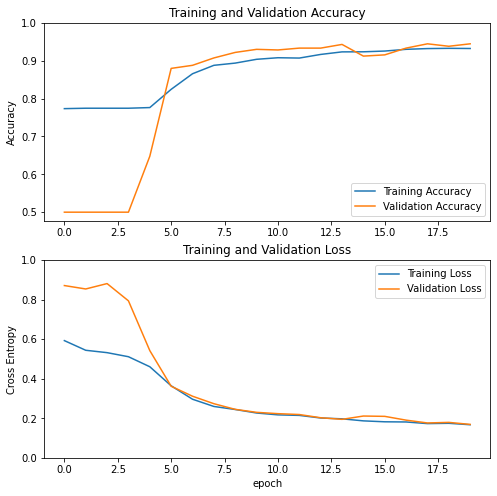

[0.3105584681034088, 0.8846153616905212]

In [95]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show();

# 7. Saving Weights

In [ ]:
model.save_weights('first_train.h5')

# 8. Testing the Model

In [ ]:
loss , accuracy = model.evaluate_generator(test_data_gen)
print(f'Loss : {loss}\nAccuracy : {accuracy}')